In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


## 1. Reading Dataset

In [2]:
data = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
print(data.shape)
data.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## 2. Exploratory Data Analysis

<AxesSubplot:xlabel='price_range', ylabel='count'>

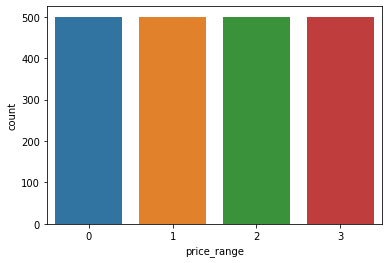

In [5]:
sns.countplot(data['price_range'])

<AxesSubplot:>

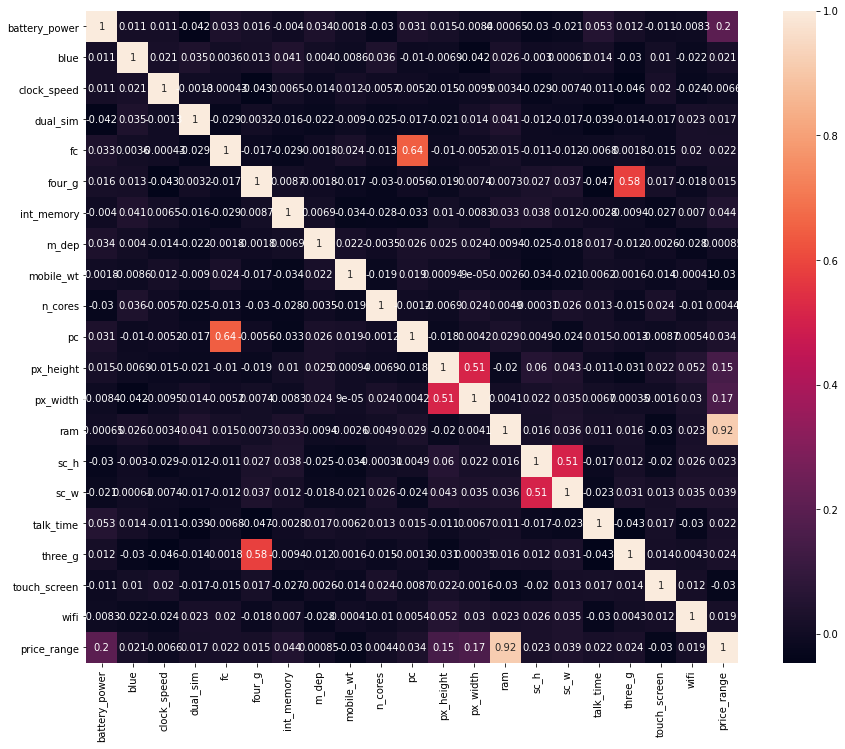

In [6]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True,square=True)

In [7]:
corr = data.corr()
Num = corr['price_range'].sort_values(ascending=False).to_frame()
cm = sns.light_palette('cyan',as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,price_range
price_range,1.000000
ram,0.917046
battery_power,0.200723
px_width,0.165818
px_height,0.148858
int_memory,0.044435
sc_w,0.038711
pc,0.033599
three_g,0.023611
sc_h,0.022986


<AxesSubplot:xlabel='price_range', ylabel='ram'>

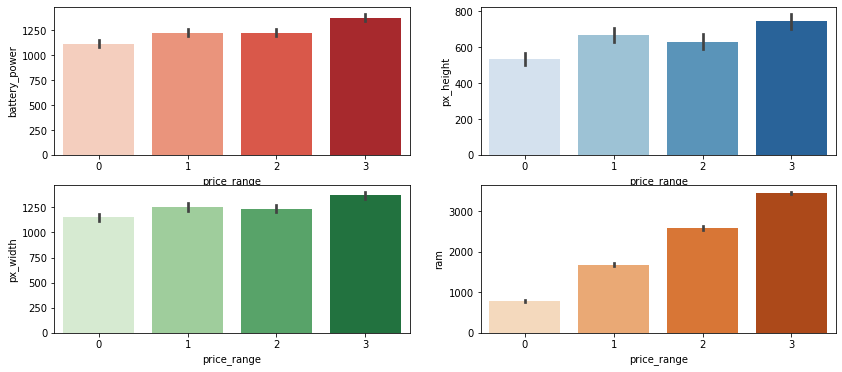

In [8]:
plt.figure(figsize=(14,6))

plt.subplot(2,2,1)
sns.barplot(x='price_range',y='battery_power',data=data,palette='Reds')
plt.subplot(2,2,2)
sns.barplot(x='price_range',y='px_height',data=data,palette='Blues')
plt.subplot(2,2,3)
sns.barplot(x='price_range',y='px_width',data=data,palette='Greens')
plt.subplot(2,2,4)
sns.barplot(x='price_range',y='ram',data=data,palette='Oranges')

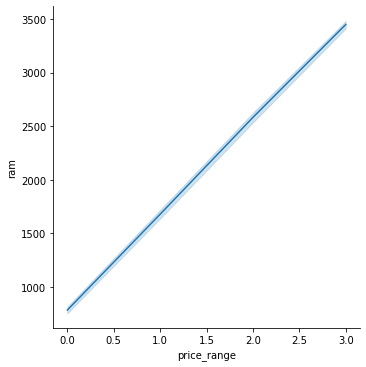

In [9]:
sns.relplot(x='price_range',y='ram',data=data,kind='line')

## 3. Feature Engineering

### (A) Feature Scaling

In [10]:
from sklearn.model_selection import train_test_split

features = data.drop(columns=['price_range'])
target = data['price_range']
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=0)

In [11]:
cols = features.columns

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train,columns=[cols])
X_test = pd.DataFrame(X_test,columns=[cols])

### (B) Feature Selection

#### Recursive feature elimination (RFE) with random forest

In [13]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf,n_features_to_select=5,step=1)
rfe = rfe.fit(X_train,y_train)

In [14]:
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: MultiIndex([('battery_power',),
            (    'mobile_wt',),
            (    'px_height',),
            (     'px_width',),
            (          'ram',)],
           )


In [15]:
pick_col = ['battery_power','mobile_wt','px_height','px_width','ram']
X_train_pick = X_train[pick_col]
X_test_pick = X_test[pick_col]

In [16]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

Accuracy is:  0.9325


<AxesSubplot:>

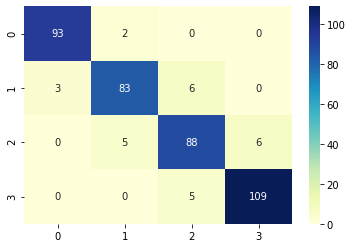

In [17]:
rfc = RandomForestClassifier()
rfc.fit(X_train_pick,y_train)
y_pred1 = rfc.predict(X_test_pick)

acc = accuracy_score(y_test,y_pred1)
print('Accuracy is: ',acc)
cm = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot=True,fmt="d",cmap='YlGnBu')

#### Recursive feature elimination with cross validation(RFECV) and random forest classification

In [18]:
from sklearn.feature_selection import RFECV

clf_rf2 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf2,step=1,cv=5,scoring='accuracy') 
rfecv = rfecv.fit(X_train,y_train)

print('Optimal number of features :',rfecv.n_features_)
print('Best features :',X_train.columns[rfecv.support_])

Optimal number of features : 4
Best features : MultiIndex([('battery_power',),
            (    'px_height',),
            (     'px_width',),
            (          'ram',)],
           )


Let's look at best accuracy in plot.

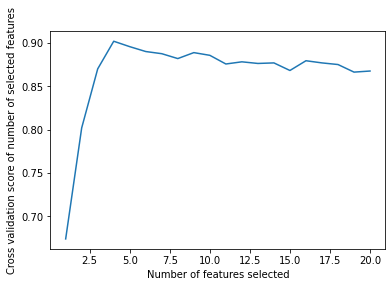

In [19]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

In [20]:
select_col = ['battery_power','px_height','px_width','ram']
X_train_selected = X_train[select_col]
X_test_selected = X_test[select_col]

Accuracy is:  0.9125


<AxesSubplot:>

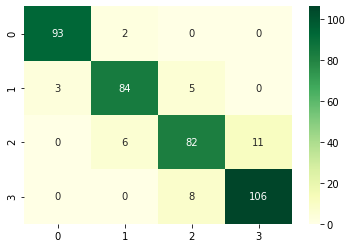

In [21]:
rfc = RandomForestClassifier()
rfc.fit(X_train_selected,y_train)
y_pred2 = rfc.predict(X_test_selected)

acc = accuracy_score(y_test,y_pred2)
print('Accuracy is: ',acc)
cm = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,annot=True,fmt="d",cmap='YlGn')

We will use the features selected by RFECV to build the model.

## 4. Building Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [23]:
def score_of_model(models,X_train,X_test,y_train,y_test):
    np.random.seed(0)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [24]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'XGBClassifier': XGBClassifier()}

In [25]:
model_score = score_of_model(models,X_train_selected,X_test_selected,y_train,y_test)

[21:02:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [26]:
cm = sns.color_palette('coolwarm',as_cmap=True)
score = model_score.style.background_gradient(cmap=cm)
score

,Score
DecisionTreeClassifier,0.867500
KNeighborsClassifier,0.882500
RandomForestClassifier,0.912500
XGBClassifier,0.935000
LogisticRegression,0.950000
SVC,0.967500


How we see - SVC gives the best results

## 5. Model Evalution

#### Run SVM with default hyperparameters 

In [27]:
# instantiate classifier with default hyperparameters
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC() 
svc.fit(X_train_selected,y_train)
y_pred = svc.predict(X_test_selected)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test,y_pred)))

Model accuracy score with default hyperparameters: 0.9675


#### Run SVM with rbf kernel and C=100.0

In [28]:
# instantiate classifier with rbf kernel and C=100
svc100 = SVC(C=100.0) 
svc100.fit(X_train_selected,y_train)
y_pred = svc100.predict(X_test_selected)
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9425


#### Run SVM with linear kernel 

In [29]:
# instantiate classifier with linear kernel and C=1.0
linear_svc = SVC(kernel='linear',C=1.0) 
linear_svc.fit(X_train_selected,y_train)
y_pred = linear_svc.predict(X_test_selected)
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test,y_pred)))

Model accuracy score with linear kernel and C=1.0 : 0.9525


#### Run SVM with polynomial kernel

In [30]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc = SVC(kernel='poly',C=1.0) 
poly_svc.fit(X_train_selected,y_train)
y_pred = poly_svc.predict(X_test_selected)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test,y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9200


#### Run SVM with sigmoid kernel 

In [31]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc = SVC(kernel='sigmoid',C=1.0) 
sigmoid_svc.fit(X_train_selected,y_train)
y_pred = sigmoid_svc.predict(X_test_selected)
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.7325


We get maximum accuracy with **rbf kernel** with C=1.0 and the accuracy is **0.9675**. Based on the above analysis we can conclude that our classification model accuracy is very good. 

In [32]:
from sklearn.metrics import classification_report,plot_confusion_matrix 

In [33]:
model = SVC() 
model.fit(X_train_selected,y_train)
y_pred = model.predict(X_test_selected)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.96      0.97      0.96        92
           2       0.97      0.94      0.95        99
           3       0.97      0.97      0.97       114

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



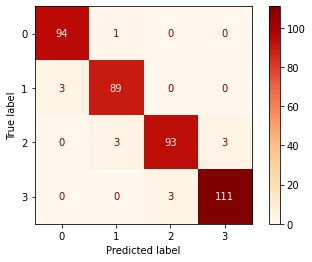

In [34]:
plot_confusion_matrix(model,X_test_selected,y_test,cmap='OrRd')

**Conclusion:**

The chosen model was SVC since it´s the most accurate, and got a perfecf accuracy.

In this project, we use RFECV to select the features.